Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


%matplotlib inline

#Data Reading and Preprocessing

In [2]:
data=pd.read_csv("/content/50_Startups.csv")

In [3]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [74]:
Data=data.rename(columns={"R&D Spend":"RnD_Spend", "Marketing Spend":"Marketing_Spend"})


In [78]:
Data.head(3)

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [76]:
Data.describe()

,RnD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [77]:
Data.nunique()

RnD_Spend          49
Administration     50
Marketing_Spend    48
State               3
Profit             50
dtype: int64

In [7]:
Data.corr()

<ipython-input-7-89628327d5af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<ipython-input-8-d2139edcbf71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), annot=True)


<Axes: >

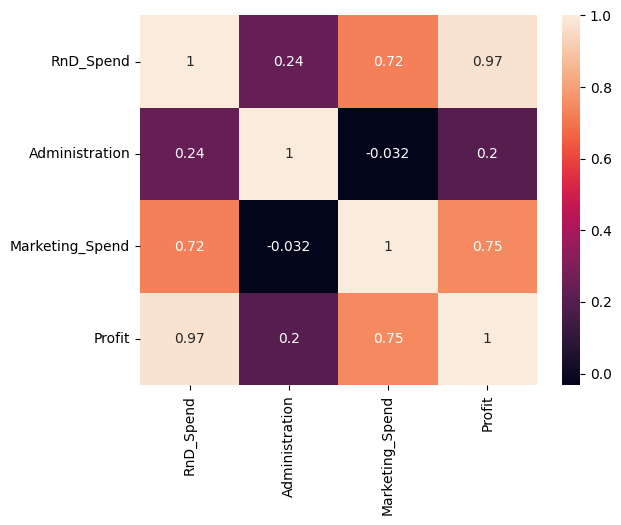

In [8]:
sns.heatmap(Data.corr(), annot=True)

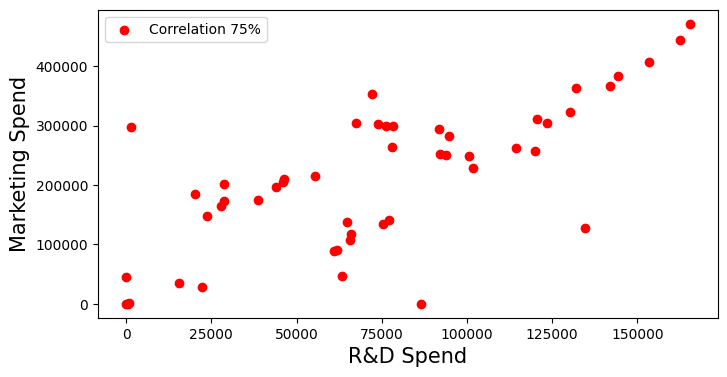

In [10]:
plt.figure(figsize=(8,4))
#plt.subplot(1,2,1)
plt.scatter(Data["RnD_Spend"],Data["Marketing_Spend"],color="red", label="Correlation 75%")
plt.xlabel("R&D Spend",size=15)
plt.ylabel("Marketing Spend",size=15)
plt.legend(loc="best")



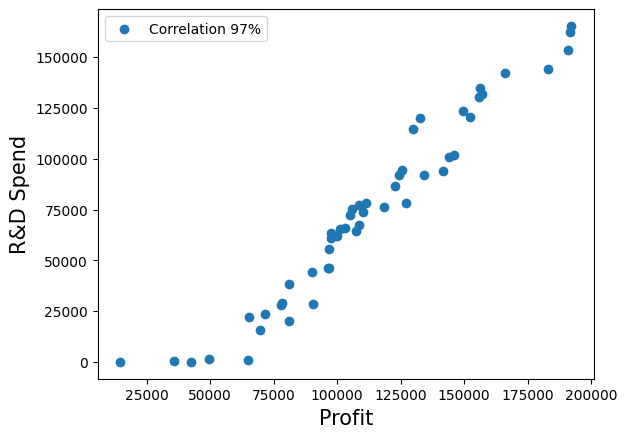

In [11]:
#plt.subplot(1,2,2)
plt.scatter(Data["Profit"],Data["RnD_Spend"],label="Correlation 97%")
plt.xlabel("Profit",size=15)
plt.ylabel("R&D Spend",size=15)
plt.legend(loc="best")

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
Data.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

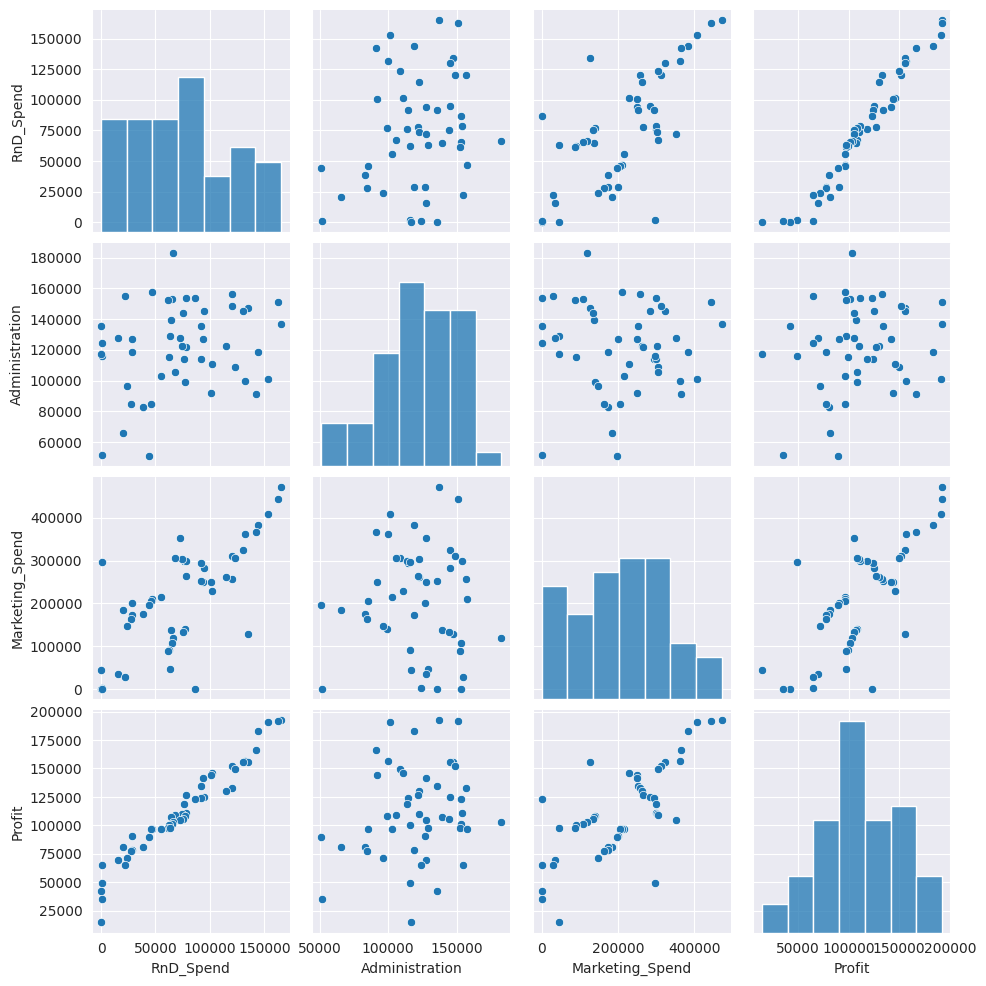

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(Data)

#MODEL 1

In [81]:
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=Data).fit()

In [82]:
model.rsquared

0.9507459940683246

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        16:24:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#VIF Calculations

In [18]:
rsq_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend',data=Data).fit().rsquared
vif_rnd = 1/(1-rsq_rnd) #

rsq_adm = smf.ols('Administration~RnD_Spend+Marketing_Spend',data=Data).fit().rsquared
vif_adm = 1/(1-rsq_adm) #

rsq_mar = smf.ols('Marketing_Spend~Administration+RnD_Spend',data=Data).fit().rsquared
vif_mar = 1/(1-rsq_mar) #


# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rnd,vif_adm,vif_mar]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


#MULTICOLLINEARITY

In [26]:
print(smf.ols('Profit~RnD_Spend+Administration',data=Data).fit().rsquared)
print(smf.ols("Profit~Administration+Marketing_Spend",data=Data).fit().rsquared)
print(smf.ols("Profit~RnD_Spend+Marketing_Spend",data=Data).fit().rsquared)


0.9478129385009173
0.6097229746770665
0.9504503015559763


#MODEL 2
#Squared trasformation

In [52]:
model2 = smf.ols('Profit~pow(RnD_Spend,2)+pow(Administration,2)+Marketing_Spend',data=Data).fit()


In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.95e-20
Time:                        15:51:41   Log-Likelihood:                -549.55
No. Observations:                  50   AIC:                             1107.
Df Residuals:                      46   BIC:                             1115.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.112e+04   7285.949      8.388      0.000    4.65e+04    7.58e+04
pow(RnD_Spend, 2)       4.172e-06   4.34e-07      9.623      0.000     3.3e-06    5.05e-06
pow(Administration, 2)  3.754e-07   3.46e-07      1.086      0.283    -3.2e-07    1.07e-06
Marketing_Spend            0.0653      0.026      2.500      0.016       0.013       0.118
==============================================================================
Omnibus:                       21.985   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.648
Skew:                          -1.388   Prob(JB):                     1.82e-08
Kurtosis:                       6.066   Cond. No.                     6.41e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Model 1 with r squared value 0.95 performs better than model 2 with r squared value 0.87

#Residual Analysis and Q-Q Plot of Model1

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  2.,  4.,
         4.,  9., 10.,  6.,  2.,  2.,  4.]),
 array([-54524.07518914, -50692.59087751, -46861.10656588, -43029.62225426,
        -39198.13794263, -35366.653631  , -31535.16931937, -27703.68500774,
        -23872.20069611, -20040.71638448, -16209.23207286, -12377.74776123,
         -8546.2634496 ,  -4714.77913797,   -883.29482634,   2948.18948529,
          6779.67379692,  10611.15810854,  14442.64242017,  18274.1267318 ,
         22105.61104343]),
 <BarContainer object of 20 artists>)

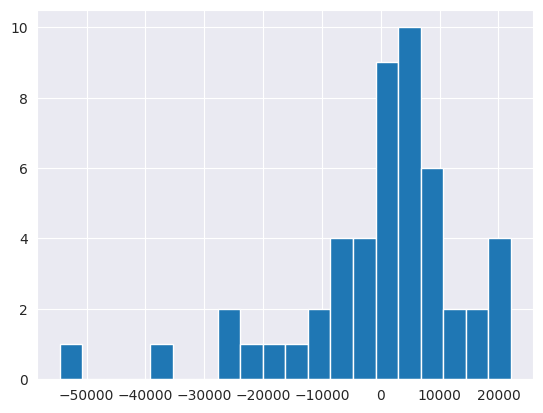

In [54]:
plt.hist(model.resid,bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebfdb595330>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebfdb5958a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebfdb595090>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebfdb595de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebfdb596080>],
 'means': []}

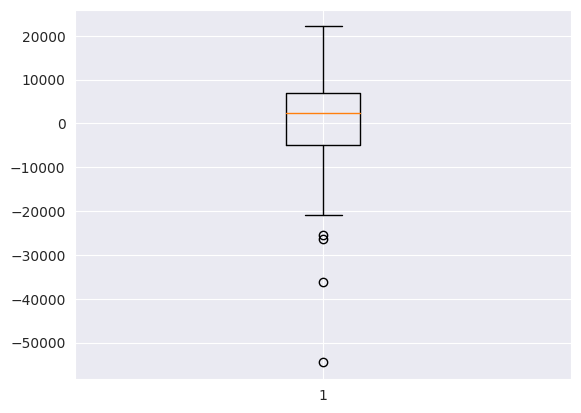

In [55]:
plt.boxplot(model.resid)

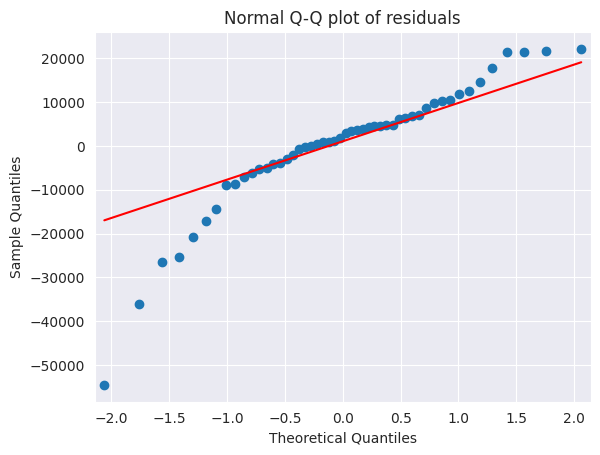

In [56]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [57]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


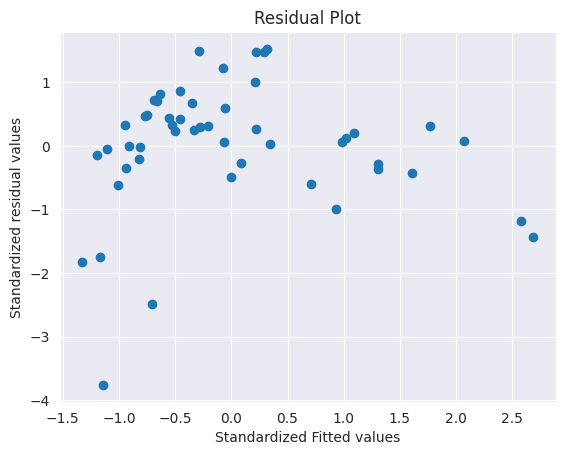

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Error vs Features(Independent)

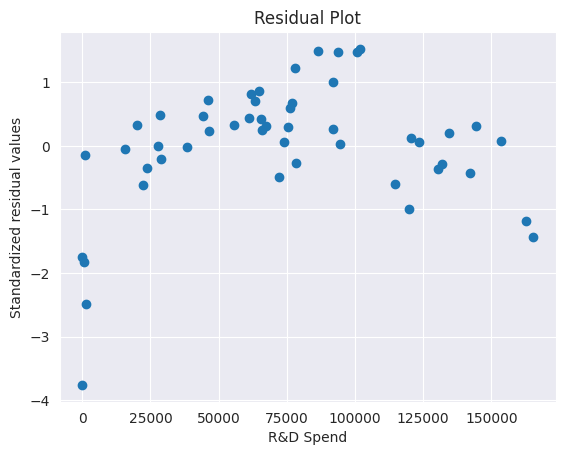

In [61]:
plt.scatter(Data["RnD_Spend"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('R&D Spend')
plt.ylabel('Standardized residual values')
plt.show()

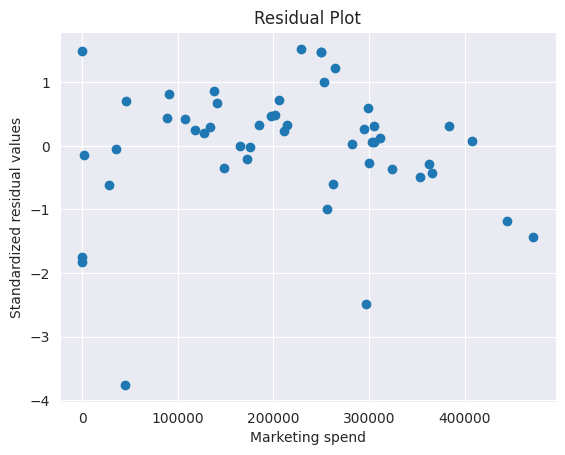

In [64]:
plt.scatter(Data["Marketing_Spend"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Marketing spend')
plt.ylabel('Standardized residual values')
plt.show()

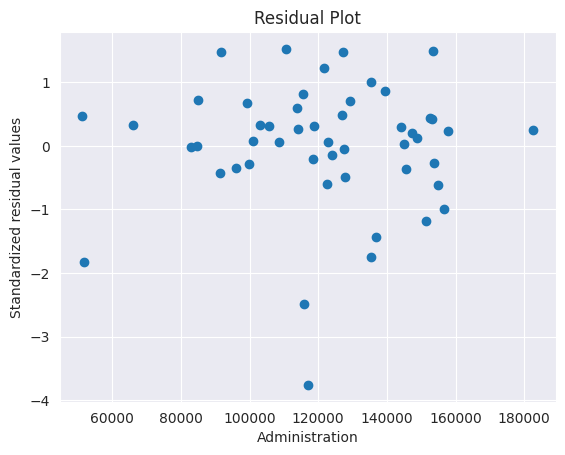

In [66]:
plt.scatter(Data["Administration"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Administration')
plt.ylabel('Standardized residual values')
plt.show()

#COOK'S PLOT

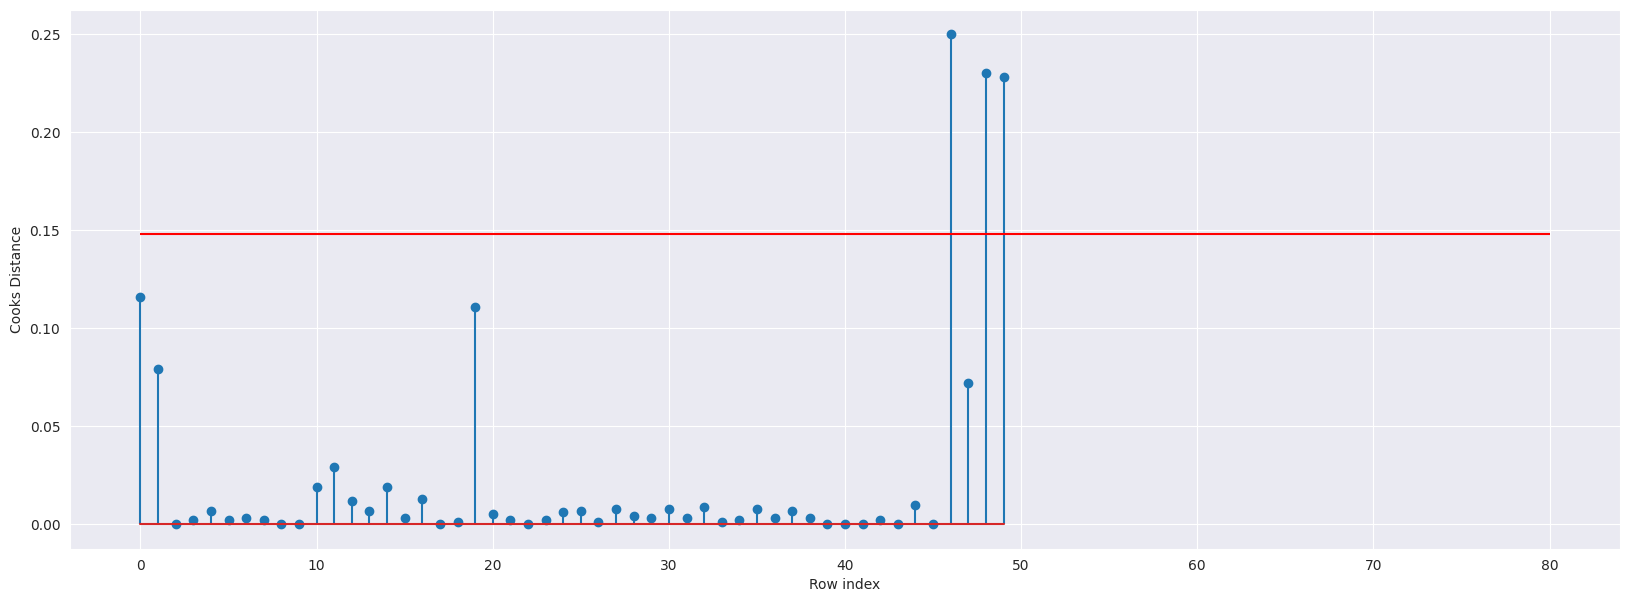

In [84]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Data)), np.round(c, 3))
plt.hlines(y=0.14814814814814814,xmin=0,xmax=80,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()